# k-MEANS

**File:** kMeansSolution.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

# LOAD DATA
Read the `iris` from "iris.csv" in the data folder and save in `df`.

In [3]:
# Reads the .csv file into variable df
df = pd.read_csv('iris.csv')

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# PREPARE DATA

In [4]:
# Separates the class variable in y
y = df.species

# Removes the y column from df
X = df.drop('species', axis=1)

# Standardizes df
X = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns)

# Displays the first 5 rows of X
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# k-MEANS

## Train the Model
We'll set up a `KMeans` object with the following parameters:

- `n_clusters`: Total number of clusters to make.
- `random_state`: Set to one to reproduce these results.
- `init`: How to initialize the k-means centers; we'll use `k-means++`.
- `n_init`: Number of times k-means would be run; the model returned would have the minimum value of `inertia`.

A few attributes of the `KMeans` object, which are also used in this demo are:
- `cluster_centers_`: Stores the discovered cluster centers.
- `labels_`: Label of each instance.
- `inertia`: Sum of square of distances of each instance from its corresponding center.
- `n_iter`: Number of iterations run to find the centers.

In [5]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(X)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

# Visualize the Clusters
The code below creates a scatterplot of the first two features. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

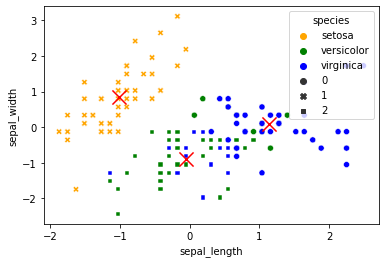

In [6]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=X, 
    hue=y,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')